# Pollution Analysis

## Section 1: Introduction and Problem Background

Particulate matter (PM) is a major health concern in heavily polluted areas such as cities and roads with heavy traffic. PM consists of a mixture of very small particles that sneak into the human body which can cause all sorts of health issues both short and long term. Health complications from exposure to PM can range from the increase of risk of respiratory infections to death. Hence our main motivation for conducting a study on PM is to understand how we better manage PM levels or limit its exposure to the public.

To achieve this we will look at some data that was obtained by monitoring PM concentration levels and the number of cars at a traffic intersection. The focus for looking at these data is to determine if there is a relationship between the number of cars at an intersection and PM concentration levels. If there is a relationship then we would like how strong that relationship is and to make predictions about PM levels given the amount of traffic in the area. I propose we use a simple linear regression model to conduct these predictions. Before I fit any model I will explore and summarize the data to see if a simple linear regression model will even work.   

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf 
import statsmodels.stats.api as sm 
import scipy.stats as sci 
import math

Correlation
           Particles      Cars
Particles   1.000000  0.300898
Cars        0.300898  1.000000

Covariance
              Particles          Cars
Particles   1228.207531  1.217415e+04
Cars       12174.153391  1.332806e+06


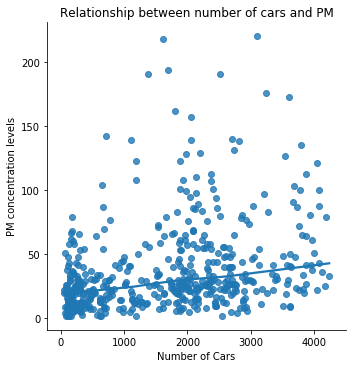

In [2]:
#Read in data
pm = pd.read_csv("PM.txt", sep = ' ')

#Graph data
sns.lmplot(x='Cars', y='Particles', data=pm, lowess=True)
plt.ylabel("PM concentration levels")
plt.xlabel("Number of Cars")
plt.title("Relationship between number of cars and PM")

print("Correlation")
print(pm.corr())
print("\nCovariance")
print(pm.cov())

###Useful metadata###
#Max: Particles = 220, Cars = 4239
#Min: Particles = 2, Cars = 45
#Mean: Particles = 37.878, Cars = 1683.222
#SD: Particles = 35.010729, Cars = 1153.317261
#Number of observations: 500

From the plot above the data seem to follow a weak positive linear trend with a none zero positive correlation coefficient of (.30) which shows that there is a weak positive linear relationship between the number of cars and number of particles. However, I notice a lot of variance in the data which makes me question the normality and equal variance assumptions we might make for a simple linear regression model. If we transform these data we might be able to ensure these assumptions are met thus making better predictions. 

KS Test:

KstestResult(statistic=0.16553207903340816, pvalue=1.9252471119260288e-12)


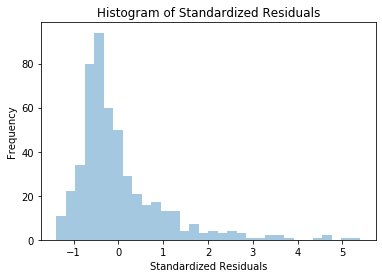

In [5]:
#Untransfomred fitted model
mlm = smf.ols(formula='Particles ~ Cars',data=pm).fit()

#Histogram of Standardized Residuals
sns.distplot(mlm.resid_pearson, kde = False) 
plt.ylabel("Frequency")
plt.xlabel("Standardized Residuals")
plt.title("Histogram of Standardized Residuals")

#KS Test
print("KS Test:\n")
print(sci.kstest(mlm.resid_pearson, 'norm'))

#Transformed fitted model
tlm = smf.ols(formula='np.log(Particles) ~ Cars',data=pm).fit()

After doing a quick exploratory analysis we can see that the residuals are not normal. To be certain they were not normal I conducted a KS Test which gave me a p-value of 1.9252e-12 which is much less than $\alpha$ = .2689 therefore we can reject the null hypothesis that the data come from a normal distribution and conclude that the the data are not normal. I propose that we use a log transformation on the response variable (Particles). After making this transformation I feel more confident in going through with using a simple linear regression model. 

## Section 2: Statistical Modeling

I will assume the following model called a Simple Linear Regression model that with a transformed response variable. Using a transformation will allow for us to make better predictions: 

**$\log{Y_i} = \beta_0 + \beta_1 X_i + \epsilon_i$** with interpretations:

- **$\log{Y_i}$** - the response variable or the natural log of the ith particle level. 

- **$\beta_0$** - The intercept. This is what we would expect the particle level to be if there were no cars. 

- **$\beta_1$** - The slope. As the number of cars increase by 1 unit particle levels would increase by $\beta_1$ on average.  

- **$X_i$** - This is a data point for the number of cars observed at an intersection used to predict the particle level. 

- **$\epsilon_i$** - Residuals or the error associated with an observation's distance from the mean. **$\epsilon_i \stackrel{iid}{\sim} N(0, \sigma^2)$** 

- **$\sigma^2$** - The variance about the line or how far our distances are from the average. Or how much particle level varies from the average given the number of cars at an intersection.  

After fitting our model to the data we should be able to predict a PM concentration level given the number of cars.

We must note that this model's ability to predict well is dependent on the following assumptions: linear, independent, normal, and equal variance which I will test shortly. In or order to use the simple linear regression model we must follow these assumptions. 

## Section 3: Model Verification

In order to determine how good our model is at predicting and if it follows the assumptions we made in our model above I will go through a process of justifying those assumptions, determining if the model fits that data well, and lastly how good our predictions will be. I will start by justifying our assumptions.   

### Hypothesis Testing

Just as a check I would like to test whether or not there is a relationship between our explanatory (Cars) and response variable (PM). 

After looking at the summary of our model we see that the p-value for the hypothesis test is essentially zero. This is well below our cutoff value of .05. Therefore, we can conclude that the number of cars has an effect on the PM. However, this does not tell us much other than there is some affect happening. There could be a number of other factors we are not accounting for and a hypothesis test does it tell us much other than something is happening.

### Checking Normality

From our histogram below we can see that the residuals are roughly normal. To verify this I used a KS Test and got a high p-value of (.5074) greater than $\alpha$ = .2689. Therefore we can not reject the null hypothesis that the data come from a normal distribution and conclude that the the data are normal. 

KS Test:

KstestResult(statistic=0.03670532756562944, pvalue=0.5074217009774152)


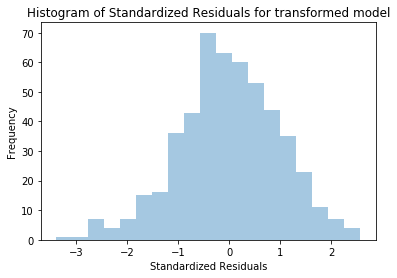

In [8]:
#Histogram of Standardized Residuals for transformed model
sns.distplot(tlm.resid_pearson, kde = False)
plt.ylabel("Frequency")
plt.xlabel("Standardized Residuals")
plt.title("Histogram of Standardized Residuals for transformed model")

#KS Test
print("KS Test:\n")
print(sci.kstest(tlm.resid_pearson, 'norm'))

### Checking Independence, linearity, and equal variance

Checking for linearity, independence and equal variance I look for any kind of patterns or clusters in the residuals. To do that I will use a Residuals vs. Fitted Values Scatterplot. From the scatterplot below I do not see much of a pattern going on as the residuals seem to be spread out evenly this verifies linearity and equal variance. As far as independence is concerned I do see a few clumps of residuals data points possibly indicating dependence. I am not an environmental expert so I am going to make the assumption that they are independent meaning that one event or data point will not affect any other event. Although given that pollution is a very complicated subject matter dependence in the data could very well be present. 

Text(0.5, 1.0, 'Residuals vs. Fitted Values Scatterplot for transformed model')

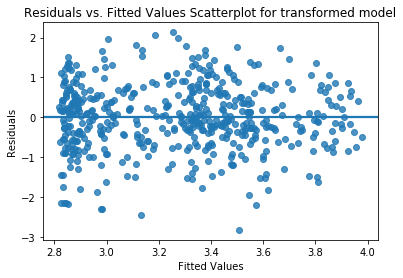

In [7]:
sns.regplot(x=tlm.fittedvalues, y=tlm.resid, data=pm, ci=None)
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.title("Residuals vs. Fitted Values Scatterplot for transformed model")

### Outliers

Lastly, I want to check for any outliers. A few we can handle but too many will throw off our predictions. To check for outliers I used Cook's Test below. From this test I got several outliers but we should be okay. Our predictions might vary a lot however.  

In [9]:
#Cook's test for outliers
cd = tlm.get_influence().cooks_distance[0] 
np.where(cd > (4.0/500))

(array([ 12,  79,  95, 127, 133, 135, 159, 169, 172, 189, 216, 219, 233,
        235, 276, 288, 309, 358, 360, 385, 394, 423, 442, 480], dtype=int64),)

### Assessing fit

To see how well our model fits the data I found an $R^2$ value of (.1296). What this means is that about 13 % of the variation in PM can be explained by Cars. I tried getting an $R^2$ value for multiple different transformed models as well as the untransformed model and this was the best value I could get. While 13% is not a lot it does indicate that some of the variation in PM concentration levels can be explained by the number of cars at an intersection which does not make our model useless. 

In [9]:
tlm.rsquared

0.12957954775952052

### Predictive capability

In [28]:
#Cross Validation

ncv = 250 
bias = np.repeat(np.NaN, ncv) 
rpmse = np.repeat(np.NaN, ncv)
coverage = np.repeat(np.NaN, ncv)
pred_interval_width = np.repeat(np.NaN, ncv)
ntest = 10 
n = 500
for cv in range(ncv):
    # Choose which obs. to put in test set
    testObs = np.random.choice(n, ntest)
    
    # Split data into test and training sets
    testSet = pm.iloc[testObs,:]
    trainSet = pm.drop(testObs)
    
    #Using training data to fit a transformed model
    trainlm = smf.ols(formula='np.log(Particles)~Cars',data=pm).fit()
    
    # Predict test set
    testPreds = trainlm.get_prediction(testSet)
    
    #Untransform 
    testPredConf = np.exp(testPreds.conf_int(obs=True))
    testPreds = np.exp(testPreds.predicted_mean)
    
    # Calculate bias
    bias[cv] = np.mean(testPreds-testSet['Particles'])
    
    # Calculate RPMSE
    rpmse[cv] = math.sqrt(np.mean((testPreds-testSet['Particles']) ** 2))
    
    # Calc coverage 
    cis = testPredConf
    cond_met = np.logical_and(cis[:,0]<=testSet['Particles'].values, cis[:,1]>=testSet['Particles'].values)
    coverage[cv] = np.mean(cond_met)
    
    #Prediction interval width
    pred_interval_width[cv] = np.mean(cis[:,1]-cis[:,0])

#Bias
print("Bias: {}".format(np.mean(bias)))

#RPMSE
print("RPMSE: {}".format(np.mean(rpmse)))

#Coverage
print("Coverage: {}".format(np.mean(coverage)))

#Prediction interval width
print("Prediction interval width: {}".format(np.mean(pred_interval_width)))

Bias: -10.365417517896622
RPMSE: 31.40613269159609
Coverage: 0.9476000000000001
Prediction interval width: 135.52080348051945


To analyze the model's predictive ability I ran through 250 cross validation studies and returned information on the bias, RPMSE, coverage interval, and prediction interval for the model. All necessary numbers were untransformed to return interpretable results. The bias says we are under-predicting. What this means is our predications about PM levels given the number of cars are on average under-predicting by about (**-10**) 10 PM. RPMSE of about **$\pm31$** says that our predictions about PM given the number of cars are on average off by about $\pm31$ PM. RPMSE of 31 is also below the standard deviation (std. dev of PM = 35). The coverage tells us the percentage of predication intervals that contain the true value we are looking for. For our model about **95%** of the true values we are looking for are are contained with in predication intervals. Lastly, prediction interval width is just the average width of our prediction or the difference between the upper and lower bounds of our prediction intervals. In our model the average width is roughly **135** PM. 

Overall, our model does an okay job at predicting on average though not prefect by any means. 

## Section 4: Results


### Fitting our model to the data

After using Python to generate a least squares estimate we get our fitted model: 

$\log{\hat{y}} = 2.805497 + 0.000277 (\hat{x}_i)$ where $\hat{y}$ and $\hat{x}_i$ are our estimators.

$log(PM)$ = 2.805497 + 0.000277 (Cars)

**2.805497** - says if there were no cars that passed through the intersection then we would expect on average the PM concentration levels to be about 2.805497. Although we could improve our interpretation if we use a principle called model centering.  

**0.000277** - tells us that on average for every additional car there is an increase of 0.000277 in PM concentration levels. 

$log(PM)$ - This represents our best prediction or estimate of log of PM concentration levels given the number of cars. In this case $\hat{y}$ (or PM) can be interpreted as the exponentiation of $\{2.805497 + 0.000277 (\hat{x}_i)\}$

Cars - This represents the number of cars that we would like to use to predict an estimated value for a PM concentration level. 

Below is a plot with a fitted line using the transformation to see this visually.  

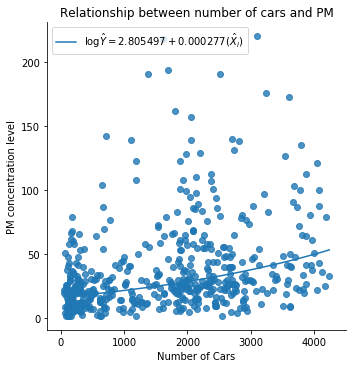

In [69]:
#tlm.params
#tlm.summary()

#Fitting transformed model to data
cars = np.linspace(45, 4239, num=100)
dframeRev = pd.DataFrame(dict(Cars=cars))
y = tlm.predict(dframeRev)
 
sns.lmplot(x='Cars', y = 'Particles', data = pm, ci=None, fit_reg=False)
plt.plot(cars, np.exp(y), label='$\log{\hat{Y}} = 2.805497 + 0.000277 (\hat{X}_i)$')

plt.ylabel("PM concentration level")
plt.xlabel("Number of Cars")
plt.title("Relationship between number of cars and PM")

#Where to place the legend
plt.legend(loc=0) 
plt.show()

In [66]:
#Calculate 95% confidence intervals for  β0  and  β1
tlm.conf_int(alpha=.05)

,0,1
Intercept,2.676754,2.93424
Cars,0.000213,0.00034


### Confidence Intervals

After running a confidence interval test we are 95% confident that a 1 unit increase in cars would increase the PM concentration level by between **.000213 and .00034** PM, on average. For our intercept we can say that we are 95% confident that when the number of cars is zero PM concentration would be between **2.676754 and 2.93424** PM. We could get a better interpretation for the intercept if we centered our model however. 

### Making predictions

If we make a prediction for 1800 cars we would expect to see about 27 PM on average with an interval of 5 and 139 PM. The down side to this prediction is that we have a lot of uncertainty. The wide variance and outliers in the data could be an explanation of why the interval is so wide. 

In [61]:
dframe = pd.DataFrame(dict(Cars=[1800]))
print("Prediction PM: {}".format(np.exp(tlm.predict(dframe))))

preds = tlm.get_prediction(pd.DataFrame(dict(Cars=[1800])))
#Calculate a 95% prediction interval for the deviation in runoff when precip=4.5 inches.
print("Predication: {}".format(np.exp(preds.conf_int(obs=True, alpha = .05)))) 

Prediction PM: 0    27.200069
dtype: float64
Predication: [[  5.33558768 138.6620878 ]]


## Section 5: Conclusions

Overall, we can conclude that there is some relationship between the number of cars at an intersection and PM concentration levels. Although our model is not perfect at modeling the data we do have a valid model that works. We can at least make predictions within a confidence interval of values, therefore, the model could be used to make informed decisions about how to manage environmental issues involving PM concentration levels and the number of cars in a given area.  

Going forward with the study I would suggest we understand two issues I saw with the data. One being the independence of the data as there could be relationships between that data that we are not accounting for here. The other is the number of outliers in the data. Perhaps there is something that is causing these outliers that we are missing. One question I might ask is if the PM concentration levels are accumulating over time which might show that all the pollution given off by cars during heavy traffic times might not show up until times when there is lesser traffic.  